<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Computer_Vision_Image_Segmentation_Pathology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PART 1 - Installing the Required Packages

In [ ]:
!pip install segmentation-models-pytorch albumentations tifffile opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 2 - Importing Standard Libraries

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2
import tifffile as tiff

## Part 3 - Accessing the test and train image paths

In [ ]:
train_path = "/content/drive/My Drive/pathologyData/train"
test_path  = "/content/drive/My Drive/pathologyData/test"

## Part 4 - Checking the match pairs b/w the Input & Masked Images

In [ ]:
def verify_image_mask_pairs(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]
    mask_files  = [f for f in os.listdir(folder_path) if f.endswith(".out")]

    image_ids = set([f.replace(".tif","") for f in image_files])
    mask_ids  = set([f.replace(".out","") for f in mask_files])

    missing_masks = image_ids - mask_ids
    missing_images = mask_ids - image_ids

    print("\nChecking:", folder_path)
    print("Images:", len(image_ids), " Masks:", len(mask_ids))

    if missing_masks:
        print("❌ Missing masks:", missing_masks)
    if missing_images:
        print("❌ Missing images:", missing_images)

    if not missing_masks and not missing_images:
        print("✅ All pairs matched")

    return sorted(list(image_ids & mask_ids))

In [ ]:
train_ids = verify_image_mask_pairs(train_path)
test_ids  = verify_image_mask_pairs(test_path)


Checking: /content/drive/My Drive/pathologyData/train
Images: 60  Masks: 0
❌ Missing masks: {'13458_500_f00014_original', '12930_500_f00001_original', '12875_500_f00051_original', '12752_500_f00057_original', '12907_500_f00023_original', '10261_500_f00020_original', '10302_500_f00579_original', '13106_500_f00047_original', '13024_500_f00010_original', '12949_500_f00056_original', '10262_500_f00357_original', '10261_500_f00001_original', '12242_500_f00021_original', '12911_500_f00082_original', '12882_500_f00257_original', '12906_500_f00500_original', '12749_500_f00174_original', '12811_500_f00068_original', '10264_500_f00318_original', '12880_500_f00448_original', '10282_500_f00040_original', '13459_500_f00020_original', '12951_500_f00099_original', '12934_500_f00098_original', '12750_500_f00003_original', '10301_500_f00010_original', '12871_500_f00003_original', '12932_500_f00040_original', '10269_00022_original', '12822_500_f00011_original', '12948_500_f00140_original', '12905_500_f

In [ ]:
import os

folder = "/content/drive/My Drive/pathologyData/train"

files = os.listdir(folder)

# Show 20 sample filenames
for f in files[:30]:
    print(f)

print("\nAll unique extensions:")
print(set([f.split(".")[-1] for f in files]))

10256_500_f00001_original.tif
10256_500_f00020_original.out.png
10256_500_f00001_original.out.png
10256_500_f00020_original.tif
10260_500_f00032_original.out.png
10261_500_f00001_original.out.png
10260_500_f00032_original.tif
10264_500_f00318_original.out.png
10262_500_f00357_original.tif
10261_500_f00001_original.tif
10261_500_f00020_original.tif
10261_500_f00020_original.out.png
10262_500_f00357_original.out.png
10279_500_f00182_original.out.png
10273_500_f00020_original.out.png
10282_500_f00040_original.out.png
10264_500_f00318_original.tif
10279_500_f00182_original.tif
10273_500_f00020_original.tif
10269_00022_original.tif
10269_00022_original.out.png
10282_500_f00040_original.tif
10301_500_f00010_original.out.png
10302_500_f00579_original.out.png
10301_500_f00010_original.tif
10307_500_f00025_original.tif
10307_500_f00025_original.out.png
10302_500_f00579_original.tif
12242_500_f00021_original.out.png
12750_500_f00003_original.out.png

All unique extensions:
{'tif', 'png'}


In [ ]:
def verify_image_mask_pairs(folder):
    image_files = [f for f in os.listdir(folder) if f.endswith("_original.tif")]
    mask_files  = [f for f in os.listdir(folder) if f.endswith("_original.out.png")]

    image_ids = [f.replace("_original.tif","") for f in image_files]
    mask_ids  = [f.replace("_original.out.png","") for f in mask_files]

    image_set = set(image_ids)
    mask_set  = set(mask_ids)

    missing_masks = image_set - mask_set
    missing_images = mask_set - image_set

    print("\nChecking:", folder)
    print("Images:", len(image_set), " Masks:", len(mask_set))

    if missing_masks:
        print("❌ Images without masks:")
        for m in missing_masks:
            print("   ", m)

    if missing_images:
        print("❌ Masks without images:")
        for m in missing_images:
            print("   ", m)

    if not missing_masks and not missing_images:
        print("✅ All image–mask pairs matched perfectly")

    return sorted(list(image_set & mask_set))

In [ ]:
train_ids = verify_image_mask_pairs(train_path)
test_ids  = verify_image_mask_pairs(test_path)


Checking: /content/drive/My Drive/pathologyData/train
Images: 60  Masks: 60
✅ All image–mask pairs matched perfectly

Checking: /content/drive/My Drive/pathologyData/test
Images: 24  Masks: 24
✅ All image–mask pairs matched perfectly


## Part 5 - Image Tiling

In [ ]:
def tile_image(image, mask, tile_size=256, min_nucleus_pixels=10):
    tiles = []

    H, W = image.shape[:2]

    for y in range(0, H, tile_size):
        for x in range(0, W, tile_size):
            img_tile = image[y:y+tile_size, x:x+tile_size]
            mask_tile = mask[y:y+tile_size, x:x+tile_size]

            if img_tile.shape[0] != tile_size or img_tile.shape[1] != tile_size:
                continue   # ignore edge fragments

            # Remove empty tiles (no nuclei)
            if mask_tile.sum() < min_nucleus_pixels:
                continue

            tiles.append((img_tile, mask_tile))

    return tiles

In [ ]:
class NucleusDataset(Dataset):
    def __init__(self, folder, ids, transform=None):
        self.folder = folder
        self.ids = ids
        self.transform = transform

        self.tiles = []
        self._build_tiles()

    def _build_tiles(self):
        print("Building tiles...")

        for base in self.ids:
            img_path  = os.path.join(self.folder, base + "_original.tif")
            mask_path = os.path.join(self.folder, base + "_original.out.png")

            image = tiff.imread(img_path)
            if len(image.shape) == 2:
                image = np.stack([image]*3, axis=-1)

            mask = tiff.imread(mask_path)
            mask = (mask > 0).astype("float32")

            tiles = tile_image(image, mask)

            for img_t, mask_t in tiles:
                self.tiles.append((img_t, mask_t))

        print(f"Total tiles created: {len(self.tiles)}")

    def __len__(self):
        return len(self.tiles)

    def __getitem__(self, idx):
        image, mask = self.tiles[idx]

        if self.transform:
            aug = self.transform(image=image, mask=mask)
            image = aug["image"]
            mask = aug["mask"].unsqueeze(0)

        return image, mask

In [ ]:
class NucleusDataset(torch.utils.data.Dataset):
    def __init__(self, folder, ids, transform=None, tile_size=256, min_nucleus_pixels=10):
        self.folder = folder
        self.ids = ids
        self.transform = transform
        self.tile_size = tile_size
        self.min_nucleus_pixels = min_nucleus_pixels

        self.tiles = []
        self._build_tiles()

    def _build_tiles(self):
        print("Building image tiles...")

        for base in self.ids:
            img_path  = os.path.join(self.folder, base + "_original.tif")
            mask_path = os.path.join(self.folder, base + "_original.out.png")

            # Load image
            image = tiff.imread(img_path)
            if len(image.shape) == 2:
                image = np.stack([image]*3, axis=-1)

            # Load mask
            import cv2
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = (mask > 0).astype("float32")

            H, W = image.shape[:2]

            for y in range(0, H, self.tile_size):
                for x in range(0, W, self.tile_size):
                    img_tile = image[y:y+self.tile_size, x:x+self.tile_size]
                    mask_tile = mask[y:y+self.tile_size, x:x+self.tile_size]

                    # Skip edge tiles
                    if img_tile.shape[0] != self.tile_size or img_tile.shape[1] != self.tile_size:
                        continue

                    # Skip empty background tiles
                    if mask_tile.sum() < self.min_nucleus_pixels:
                        continue

                    self.tiles.append((img_tile, mask_tile))

        print(f"Total valid tiles: {len(self.tiles)}")

    def __len__(self):
        return len(self.tiles)

    def __getitem__(self, idx):
        image, mask = self.tiles[idx]

        if self.transform:
            aug = self.transform(image=image, mask=mask)
            image = aug["image"]
            mask = aug["mask"].unsqueeze(0)

        return image, mask


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_tfms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(
        shift_limit=0.05,
        scale_limit=0.10,
        rotate_limit=15,
        p=0.5
    ),
    A.Normalize(),
    ToTensorV2()
])

test_tfms = A.Compose([
    A.Normalize(),
    ToTensorV2()
])

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from torch.utils.data import DataLoader

# Create datasets (this triggers tiling internally)
train_ds = NucleusDataset(train_path, train_ids, transform=train_tfms)
test_ds  = NucleusDataset(test_path, test_ids, transform=test_tfms)

# Print how many tiles we actually got
print("Training tiles:", len(train_ds))
print("Testing tiles:",  len(test_ds))

# DataLoaders
train_loader = DataLoader(
    train_ds,
    batch_size=8,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_ds,
    batch_size=8,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

Building image tiles...
Total valid tiles: 2893
Building image tiles...
Total valid tiles: 1140
Training tiles: 2893
Testing tiles: 1140


In [ ]:
import segmentation_models_pytorch as smp
import torch

# Create UNet with ResNet-18 backbone
model = smp.Unet(
    encoder_name="resnet18",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1,
    activation=None
)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Model loaded on:", device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Model loaded on: cuda


In [ ]:
import torch.nn as nn
import segmentation_models_pytorch as smp

dice_loss = smp.losses.DiceLoss(mode="binary")
bce_loss  = nn.BCEWithLogitsLoss()

def combined_loss(preds, targets):
    return dice_loss(preds, targets) + bce_loss(preds, targets)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print("Combined loss and optimizer initialized")

Combined loss and optimizer initialized


In [ ]:
epochs = 15

for epoch in range(epochs):
    model.train()
    running_loss = 0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        preds = model(images)

        # Compute loss
        loss = combined_loss(preds, masks)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/15]  Loss: 0.2192
Epoch [2/15]  Loss: 0.2144
Epoch [3/15]  Loss: 0.2095
Epoch [4/15]  Loss: 0.2080
Epoch [5/15]  Loss: 0.2052
Epoch [6/15]  Loss: 0.2025
Epoch [7/15]  Loss: 0.2012
Epoch [8/15]  Loss: 0.1997
Epoch [9/15]  Loss: 0.2013
Epoch [10/15]  Loss: 0.1951
Epoch [11/15]  Loss: 0.1943
Epoch [12/15]  Loss: 0.1912
Epoch [13/15]  Loss: 0.1916
Epoch [14/15]  Loss: 0.1909
Epoch [15/15]  Loss: 0.1890


In [ ]:
import torch

def compute_precision_recall(model, dataloader, threshold=0.5):
    model.eval()

    TP = 0
    FP = 0
    FN = 0

    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)

            logits = model(images)
            probs = torch.sigmoid(logits)
            preds = (probs > threshold).float()

            TP += ((preds == 1) & (masks == 1)).sum().item()
            FP += ((preds == 1) & (masks == 0)).sum().item()
            FN += ((preds == 0) & (masks == 1)).sum().item()

    precision = TP / (TP + FP + 1e-8)
    recall    = TP / (TP + FN + 1e-8)

    return precision, recall

## Part 6 - Evaluation Metric for image Tiles

In [ ]:
precision, recall = compute_precision_recall(model, test_loader)

print("\n===== Final Test Metrics (Nucleus Class) =====")
print("Precision:", round(precision, 4))
print("Recall:   ", round(recall, 4))


===== Final Test Metrics (Nucleus Class) =====
Precision: 0.9203
Recall:    0.9259


## Part 7 - Calculating Evaluation Metric for Full Image

In [ ]:
def predict_full_image(model, folder, image_id, tile_size=256):
    model.eval()

    img_path  = os.path.join(folder, image_id + "_original.tif")
    mask_path = os.path.join(folder, image_id + "_original.out.png")

    # Load image and mask
    image = tiff.imread(img_path)
    if len(image.shape) == 2:
        image = np.stack([image]*3, axis=-1)

    gt_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask = (gt_mask > 0).astype("uint8")

    H, W = gt_mask.shape
    pred_mask = np.zeros((H, W), dtype=np.uint8)

    with torch.no_grad():
        for y in range(0, H, tile_size):
            for x in range(0, W, tile_size):
                tile = image[y:y+tile_size, x:x+tile_size]

                if tile.shape[0] != tile_size or tile.shape[1] != tile_size:
                    continue

                tile_norm = A.Normalize()(image=tile)["image"]
                tile_tensor = torch.from_numpy(tile_norm).permute(2,0,1).unsqueeze(0).float().to(device)

                pred = torch.sigmoid(model(tile_tensor))[0,0].cpu().numpy()
                pred = (pred > 0.5).astype("uint8")

                pred_mask[y:y+tile_size, x:x+tile_size] = pred

    return pred_mask, gt_mask

In [ ]:
def precision_recall_from_masks(pred, gt):
    TP = np.logical_and(pred==1, gt==1).sum()
    FP = np.logical_and(pred==1, gt==0).sum()
    FN = np.logical_and(pred==0, gt==1).sum()

    precision = TP / (TP + FP + 1e-8)
    recall    = TP / (TP + FN + 1e-8)

    return precision, recall

In [ ]:
import cv2

all_precisions = []
all_recalls = []

for image_id in test_ids:
    pred_mask, gt_mask = predict_full_image(model, test_path, image_id)

    p, r = precision_recall_from_masks(pred_mask, gt_mask)
    all_precisions.append(p)
    all_recalls.append(r)

    print(f"{image_id} → Precision: {p:.3f}, Recall: {r:.3f}")

13591_500_f00006 → Precision: 0.920, Recall: 0.742
13616_500_f00087 → Precision: 0.947, Recall: 0.795
13617_500_f00023 → Precision: 0.909, Recall: 0.758
13687_500_f00001 → Precision: 0.921, Recall: 0.705
13688_500_f00001 → Precision: 0.890, Recall: 0.499
13689_500_f00011 → Precision: 0.905, Recall: 0.732
13693_500_f00052 → Precision: 0.922, Recall: 0.737
13694_500_f00304 → Precision: 0.930, Recall: 0.650
14079_500_f00138 → Precision: 0.932, Recall: 0.756
14081_500_f00046 → Precision: 0.908, Recall: 0.728
14082_500_f00006 → Precision: 0.903, Recall: 0.748
14153_500_f00019 → Precision: 0.925, Recall: 0.739
14154_500_f00029 → Precision: 0.939, Recall: 0.732
14192_500_f00042 → Precision: 0.933, Recall: 0.788
14210_500_f00009 → Precision: 0.915, Recall: 0.713
14213_500_f00011 → Precision: 0.908, Recall: 0.757
14304_500_f00008 → Precision: 0.923, Recall: 0.743
14305_500_f00048 → Precision: 0.917, Recall: 0.728
14306_500_f00012 → Precision: 0.903, Recall: 0.739
15473_500_f00021 → Precision: 0

In [ ]:
print("\n===== Final Whole-Image Results (24 images) =====")
print("Mean Precision:", np.mean(all_precisions))
print("Mean Recall:   ", np.mean(all_recalls))


===== Final Whole-Image Results (24 images) =====
Mean Precision: 0.917271231429671
Mean Recall:    0.7256972524027336


Storing the values of Recall and Precision

In [ ]:
import numpy as np
import cv2

all_precisions = []
all_recalls = []
all_predictions = {}   # store masks for visualization

for image_id in test_ids:
    pred_mask, gt_mask = predict_full_image(model, test_path, image_id)

    TP = np.logical_and(pred_mask==1, gt_mask==1).sum()
    FP = np.logical_and(pred_mask==1, gt_mask==0).sum()
    FN = np.logical_and(pred_mask==0, gt_mask==1).sum()

    precision = TP / (TP + FP + 1e-8)
    recall    = TP / (TP + FN + 1e-8)

    all_precisions.append(precision)
    all_recalls.append(recall)

    all_predictions[image_id] = (pred_mask, gt_mask)

    print(f"{image_id} → Precision: {precision:.3f}, Recall: {recall:.3f}")

13591_500_f00006 → Precision: 0.920, Recall: 0.742
13616_500_f00087 → Precision: 0.947, Recall: 0.795
13617_500_f00023 → Precision: 0.909, Recall: 0.758
13687_500_f00001 → Precision: 0.921, Recall: 0.705
13688_500_f00001 → Precision: 0.890, Recall: 0.499
13689_500_f00011 → Precision: 0.905, Recall: 0.732
13693_500_f00052 → Precision: 0.922, Recall: 0.737
13694_500_f00304 → Precision: 0.930, Recall: 0.650
14079_500_f00138 → Precision: 0.932, Recall: 0.756
14081_500_f00046 → Precision: 0.908, Recall: 0.728
14082_500_f00006 → Precision: 0.903, Recall: 0.748
14153_500_f00019 → Precision: 0.925, Recall: 0.739
14154_500_f00029 → Precision: 0.939, Recall: 0.732
14192_500_f00042 → Precision: 0.933, Recall: 0.788
14210_500_f00009 → Precision: 0.915, Recall: 0.713
14213_500_f00011 → Precision: 0.908, Recall: 0.757
14304_500_f00008 → Precision: 0.923, Recall: 0.743
14305_500_f00048 → Precision: 0.917, Recall: 0.728
14306_500_f00012 → Precision: 0.903, Recall: 0.739
15473_500_f00021 → Precision: 0

## Part - 8a :Viewing the image on which Recall and Precision is calculated.(Crop Mode)

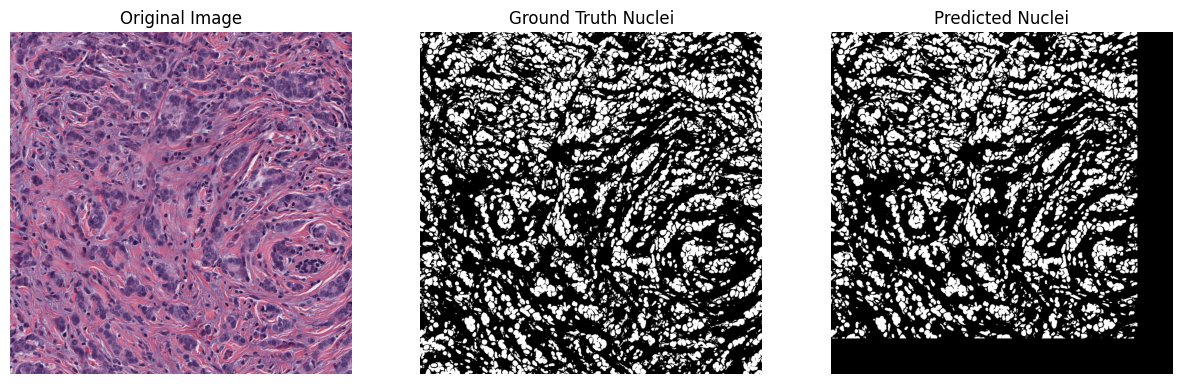

In [ ]:
import matplotlib.pyplot as plt
import tifffile as tiff

sample_id = test_ids[0]

img = tiff.imread(os.path.join(test_path, sample_id + "_original.tif"))
if len(img.shape)==2:
    img = np.stack([img]*3, axis=-1)

pred_mask, gt_mask = all_predictions[sample_id]

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ground Truth Nuclei")
plt.imshow(gt_mask, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Predicted Nuclei")
plt.imshow(pred_mask, cmap="gray")
plt.axis("off")

plt.show()

In the above output crop mode is considered where the prediction happens with the fixed tile length and ignores the other edges.

## Part - 8b :Viewing the image on which Recall and Precision is calculated.(Padding Mode)

In [ ]:
def predict_full_image_padded(model, folder, image_id, tile_size=256):
    model.eval()

    img_path  = os.path.join(folder, image_id + "_original.tif")
    mask_path = os.path.join(folder, image_id + "_original.out.png")

    # Load image
    image = tiff.imread(img_path)
    if len(image.shape) == 2:
        image = np.stack([image]*3, axis=-1)

    # Load GT mask
    gt_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    gt_mask = (gt_mask > 0).astype("uint8")

    H, W = gt_mask.shape

    # Compute padding
    pad_h = (tile_size - H % tile_size) % tile_size
    pad_w = (tile_size - W % tile_size) % tile_size

    # Pad image & mask
    image_padded = np.pad(image, ((0,pad_h),(0,pad_w),(0,0)), mode="reflect")
    gt_padded    = np.pad(gt_mask, ((0,pad_h),(0,pad_w)), mode="constant")

    Hp, Wp = gt_padded.shape
    pred_padded = np.zeros((Hp, Wp), dtype=np.uint8)

    with torch.no_grad():
        for y in range(0, Hp, tile_size):
            for x in range(0, Wp, tile_size):
                tile = image_padded[y:y+tile_size, x:x+tile_size]

                tile_norm = A.Normalize()(image=tile)["image"]
                tile_tensor = torch.from_numpy(tile_norm).permute(2,0,1).unsqueeze(0).float().to(device)

                pred = torch.sigmoid(model(tile_tensor))[0,0].cpu().numpy()
                pred = (pred > 0.5).astype("uint8")

                pred_padded[y:y+tile_size, x:x+tile_size] = pred

    # Crop back to original size
    pred_mask = pred_padded[:H, :W]

    return image, gt_mask, pred_mask

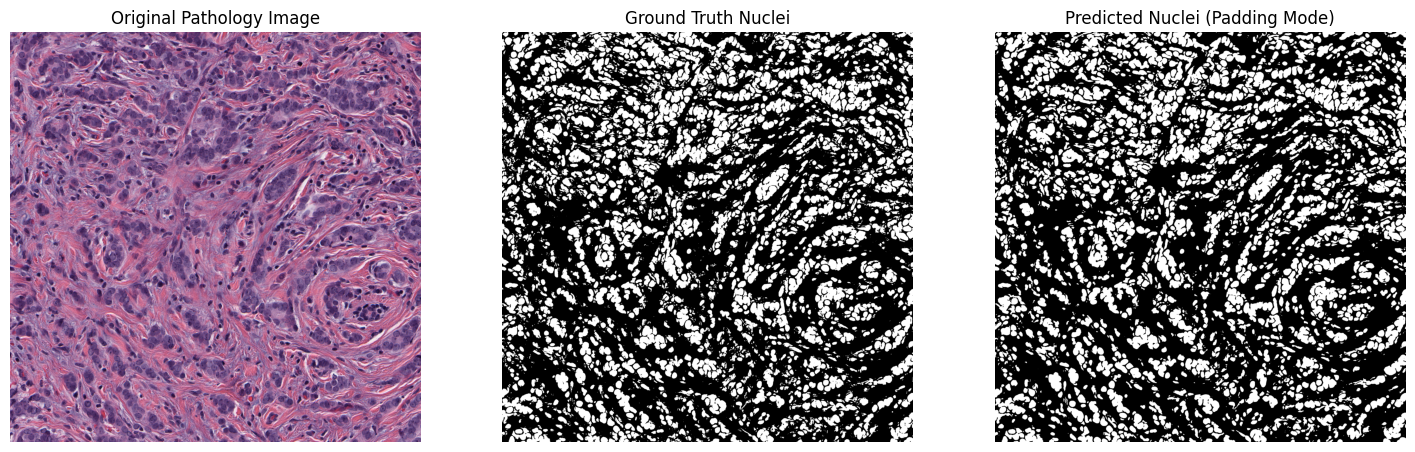

In [ ]:
sample_id = test_ids[0]   # any image from the 24 test slides

image, gt_mask, pred_mask = predict_full_image_padded(model, test_path, sample_id)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Original Pathology Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ground Truth Nuclei")
plt.imshow(gt_mask, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Predicted Nuclei (Padding Mode)")
plt.imshow(pred_mask, cmap="gray")
plt.axis("off")

plt.show()

## Part 9 - Calculating IOU

In [ ]:
ious = []

for image_id in test_ids:
    pred_mask, gt_mask = all_predictions[image_id]

    intersection = np.logical_and(pred_mask==1, gt_mask==1).sum()
    union = np.logical_or(pred_mask==1, gt_mask==1).sum()

    iou = intersection / (union + 1e-8)
    ious.append(iou)

print("Mean IoU:", np.mean(ious))

Mean IoU: 0.6813630968569213


## Part 10 :confusion matrix

In [ ]:
import pandas as pd

TP = FP = FN = TN = 0

for image_id in test_ids:
    pred_mask, gt_mask = all_predictions[image_id]

    TP += np.logical_and(pred_mask==1, gt_mask==1).sum()
    FP += np.logical_and(pred_mask==1, gt_mask==0).sum()
    FN += np.logical_and(pred_mask==0, gt_mask==1).sum()
    TN += np.logical_and(pred_mask==0, gt_mask==0).sum()

conf_matrix = pd.DataFrame(
    [[TP, FP],
     [FN, TN]],
    index=["Actual Nucleus", "Actual Background"],
    columns=["Predicted Nucleus", "Predicted Background"]
)

conf_matrix

,Predicted Nucleus,Predicted Background
Actual Nucleus,13580431,1176185
Actual Background,4849722,76393662


In [3]:
jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --inplace Computer_Vision_Image_Segemetation_Pathology.ipynb

SyntaxError: invalid syntax (ipython-input-4030639196.py, line 1)

In [4]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --inplace Computer_Vision_Image_Segemetation_Pathology.ipynb

[NbConvertApp] WARNING | pattern 'Computer_Vision_Image_Segemetation_Pathology.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterA

In [6]:
import nbformat
import os # Added os module for checking file existence

# Verify the actual filename of your notebook in the Colab environment.
# For example, if your notebook is named 'MySegmentationProject.ipynb',
# you should set path = 'MySegmentationProject.ipynb'.
path = "Computer_Vision_Image_Segemetation_Pathology.ipynb"

# Check if the file exists before attempting to read it
if not os.path.exists(path):
    print(f"Error: The file '{path}' was not found. Please ensure the notebook file exists and the path is correct.")
else:
    nb = nbformat.read(path, as_version=4)

    # Remove problematic widget metadata
    nb.metadata.pop("widgets", None)

    nbformat.write(nb, path)

    print("Notebook metadata cleaned successfully!")

Error: The file 'Computer_Vision_Image_Segemetation_Pathology.ipynb' was not found. Please ensure the notebook file exists and the path is correct.
